In [25]:
"""
Import
"""
from matplotlib.colors import ListedColormap, BoundaryNorm, TwoSlopeNorm,LinearSegmentedColormap,LogNorm
import matplotlib.cm as cm
import matplotlib.lines as mlines
from typing import List

import numpy as np
import pandas as pd
import xarray as xr
import pickle
import os
import glob
import sys
from datetime import datetime,timedelta
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy.ma as ma
import cartopy.crs as ccrs  # Import cartopy ccrs
import cartopy.feature as cfeature  # Import cartopy common features
from matplotlib import animation
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
import scipy.stats
import math
import time as time_mod
sys.path.insert(0, "/home/chalifour/code/master")
from fct_script.func_py import get_proj_extent
import fct_script.rpn_funcs_chris as rpn_chris
from fct_script.get_domain import get_domain_info
from fct_script.func_py import get_colormap_precip,categorical_cmap
from matplotlib.patches import Patch
# from func_py import get_proj_extent
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units
try:
    import rpnpy.librmn.all as rmn  # Module to read RPN files
    from rotated_lat_lon import RotatedLatLon  # Module to project field on native grid (created by Sasha Huziy)
except ImportError as err:
    print(f"RPNPY can only be use on the server. It can't be use on a personal computer."
          f"\nError throw :{err}")


# Time

In [45]:
date = '2021-12-06'
f_hr = 48

# date = '2022-03-25'
# f_hr = 48

datetimeobject = datetime.strptime(date, '%Y-%m-%d')
new_format = datetimeobject.strftime('%Y%m%d')
format_rpn_file = datetimeobject.strftime('%Y%m')
#
run = pd.Timestamp(fr'{date} 00')


valid_time = run + pd.Timedelta(str(f_hr) + ' h')
timestamps = pd.date_range(run, valid_time, freq='12 H')
time = timestamps


In [46]:
list_stat= ['WMW','YZV']
for stat in list_stat:
    for time in timestamps:
        rpn_chris.download_sounding_data(stat,time,output_dir=f'/upslope/chalifour/projet_maitrise/sounding_data/{stat}/')

In [48]:
df_tt_11km  = pd.read_csv('/upslope/chalifour/projet_maitrise/data_sim_station/data_alt_202112/11km/TT.csv', parse_dates=['date'],header=0)
df_tt_11km.set_index('date', inplace=True)
df_tt_11km = df_tt_11km.loc[timestamps]

df_tt_2p5km  = pd.read_csv('/upslope/chalifour/projet_maitrise/data_sim_station/data_alt_202112/2p5km/TT.csv', parse_dates=['date'],header=0)
df_tt_2p5km.set_index('date', inplace=True)
df_tt_2p5km = df_tt_2p5km.loc[timestamps]


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: DatetimeIndex(['2021-12-08'], dtype='datetime64[ns]', freq='12H'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

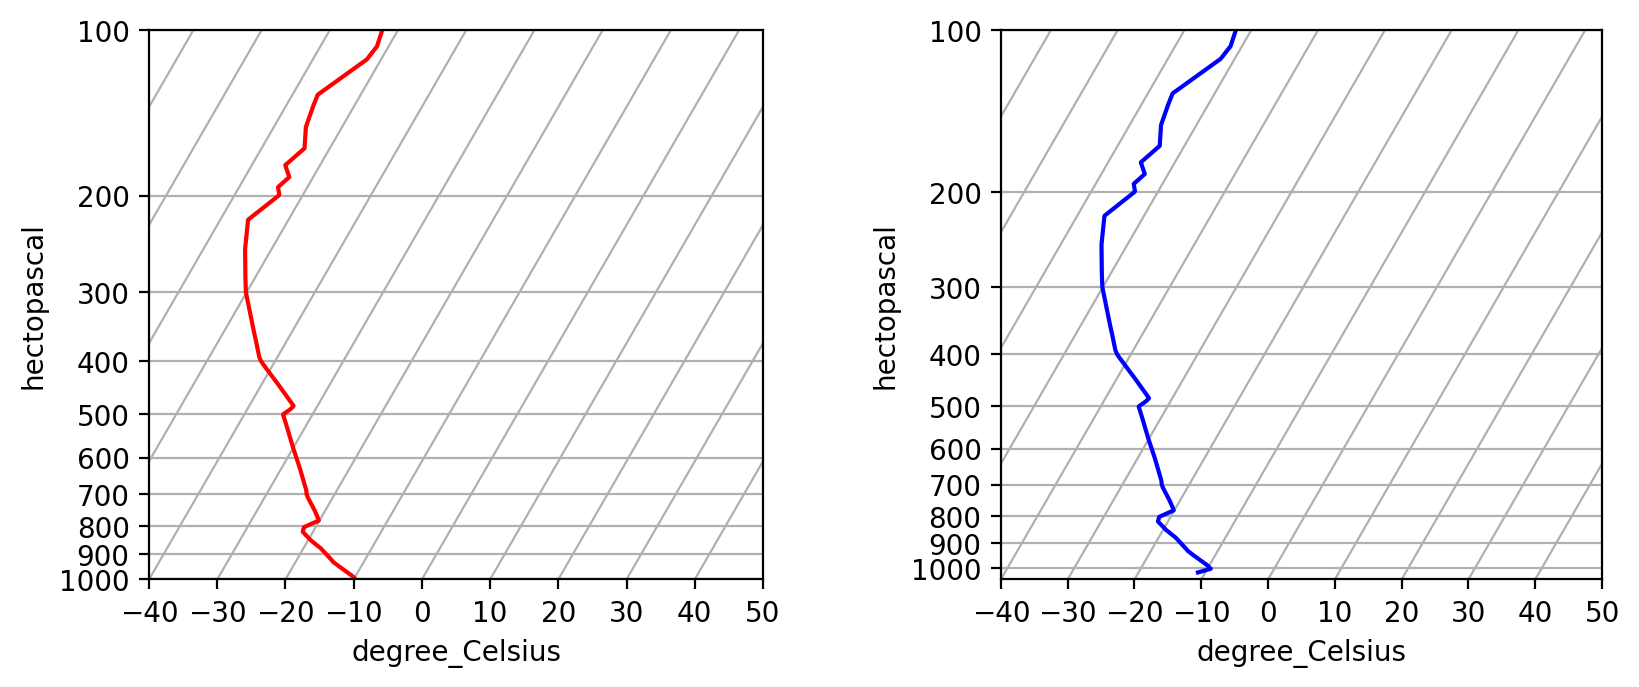

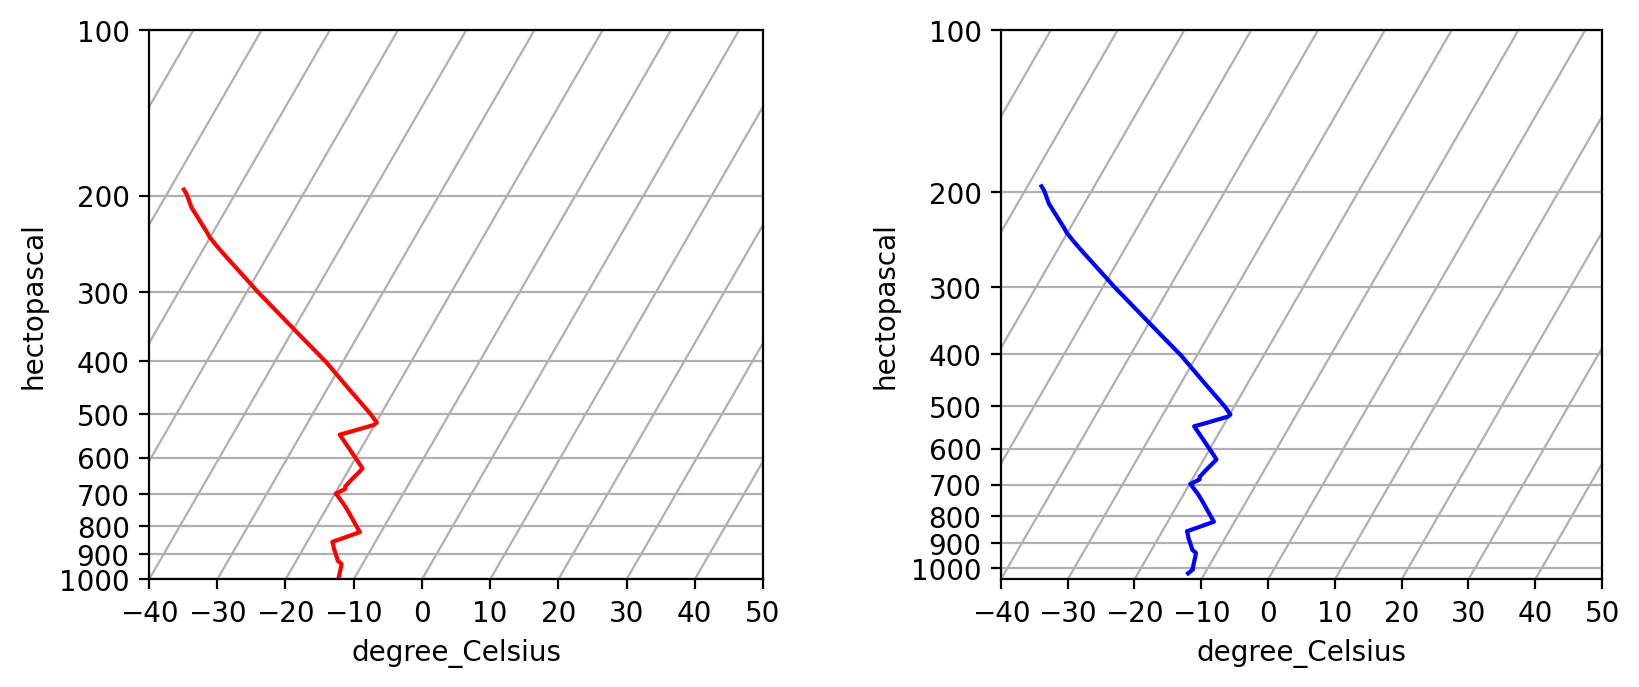

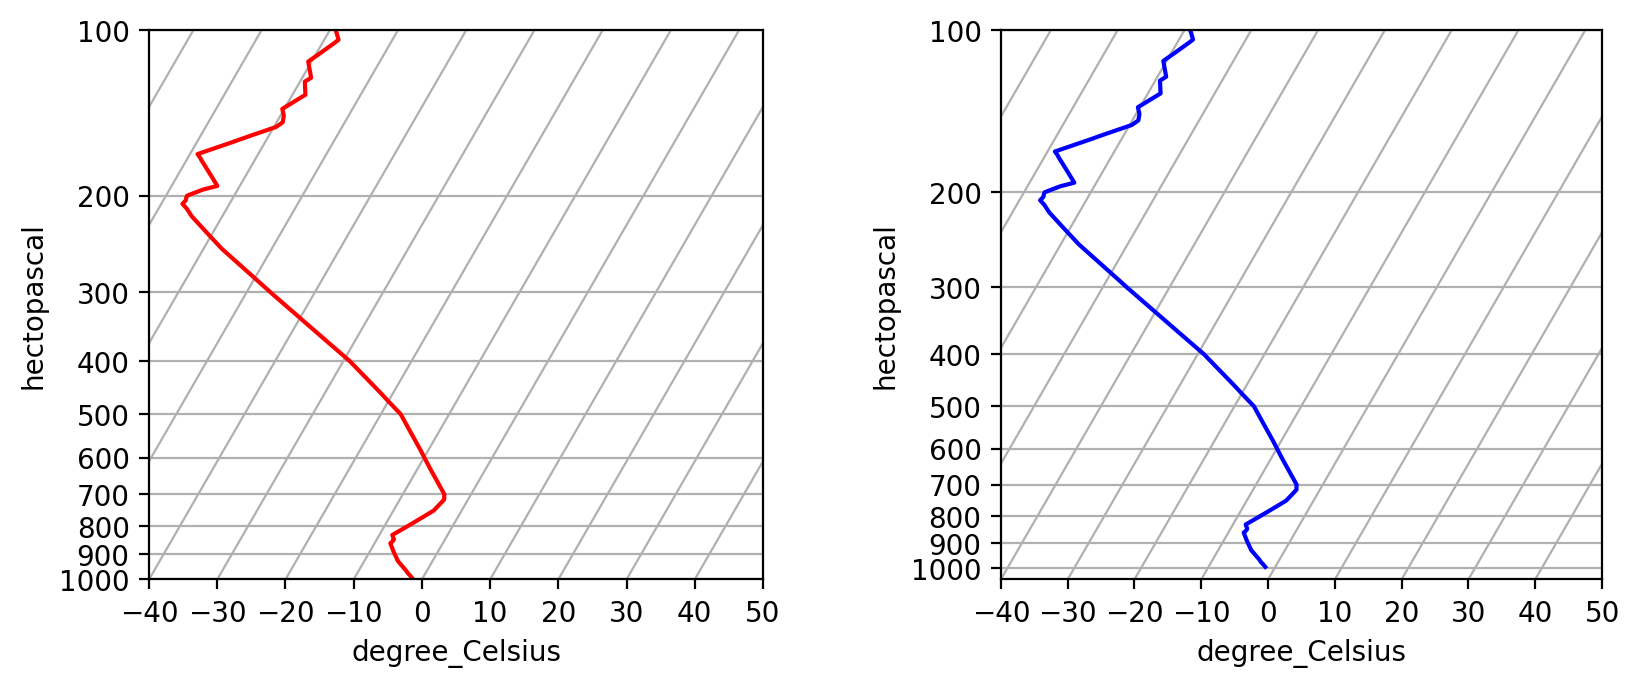

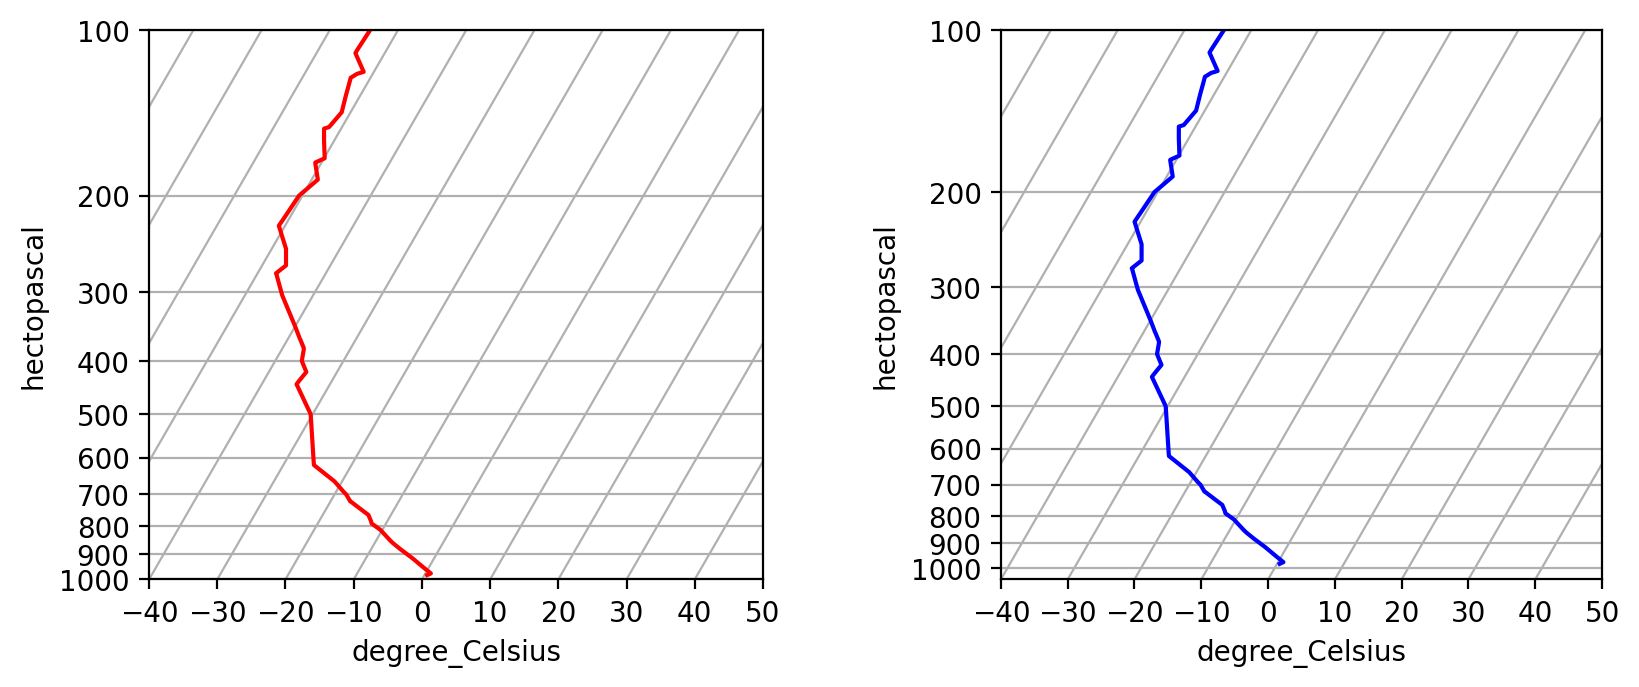

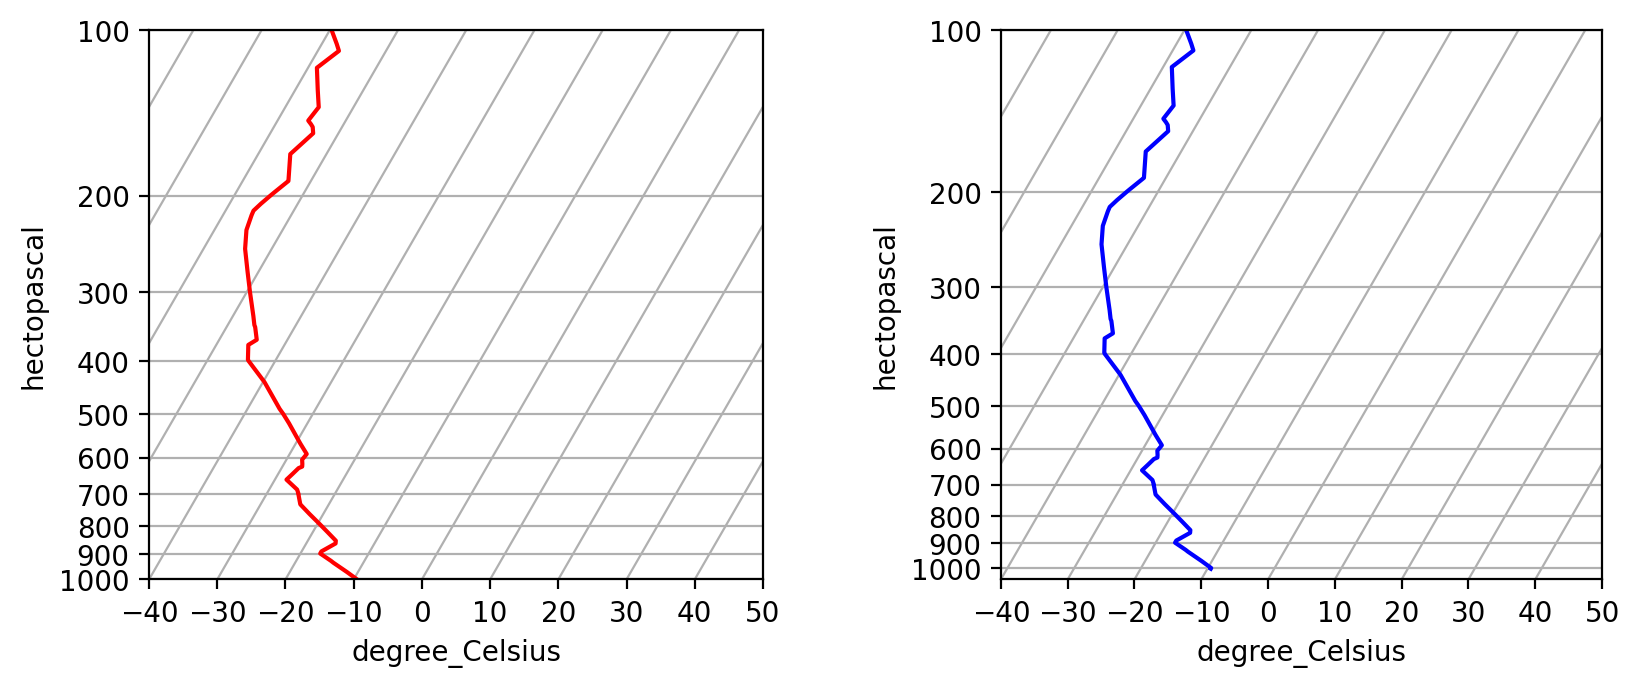

In [49]:

for time in timestamps:
    df_sounding_WMW  = pd.read_csv(f'/upslope/chalifour/projet_maitrise/sounding_data/WMW/WMW.{time.strftime("%Y%m%d%H")}.txt',delim_whitespace=True)
    # df_sounding_WMW.set_index('PRES', inplace=True)

    df_sounding_YZV  = pd.read_csv(f'/upslope/chalifour/projet_maitrise/sounding_data/YZV/YZV.{time.strftime("%Y%m%d%H")}.txt',delim_whitespace=True)
    # df_sounding_YZU.set_index('PRES', inplace=True)

    fig = plt.figure(facecolor='white',dpi=200,figsize=(20,8))
    # ax1 = fig.add_subplot(211)
    # ax2 = fig.add_subplot(221)

    skew1= SkewT(fig,subplot=[221],rotation=30)
    skew2= SkewT(fig,subplot=[211],rotation=30)

    p = df_sounding_YZV['PRES'].values * units.hPa
    T = df_sounding_YZV['TEMP'].values * units.degC
    Td = df_sounding_YZV['DWPT'].values * units.degC



    skew1.plot(p, T, 'r')
    skew2.plot(p, T, 'b')
    # skew1.plot(p_11km, T_11km, 'b')
    # skew.plot(p, Td, 'g')
    # skew.plot_barbs(p, u, v)
    skew1.ax.set_ylim(1000, 100)

    # skew1.ax.set_xlim(-40, 60)
    plt.show()

